# 多项式回归中，我们假定$y$与$x$之间的关系可以用一个多项式来描述：
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d + \varepsilon.$$

Best parameters: {'polynomialfeatures__degree': 5, 'ridge__alpha': 1}
Best CV MSE: 0.0875603630076346
Test MSE: 0.09834205501545715
Test R2 Score: 0.830282434029699


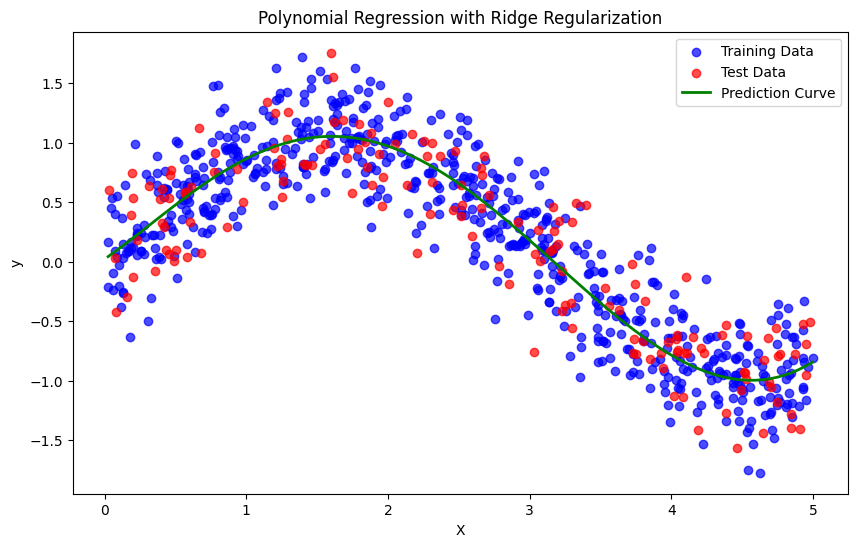

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. 数据生成与预处理
np.random.seed(42)

# 生成80个自变量样本，范围在[0,5]内，并按升序排列
X = np.sort(5 * np.random.rand(800, 1), axis=0)

# 根据非线性函数生成因变量，并加入正态分布噪声模拟真实数据
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])

# 将数据划分为训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 构建多项式回归模型及优化
# 使用Pipeline将多项式特征转换和Ridge正则化组合在一起
# 通过多项式特征转换，可以捕捉数据的非线性关系；
# 通过Ridge正则化（岭回归）可以防止模型过拟合问题

# 构造pipeline：
# 第一步：PolynomialFeatures(include_bias=False)（不自动添加常数项）
# 第二步：Ridge()（岭回归）
pipeline = make_pipeline(PolynomialFeatures(include_bias=False), Ridge())

# 定义参数网格，用于网格搜索优化：
# - 'poly__degree'：多项式的阶数，范围从1到8
# - 'ridge__alpha'：岭回归中的正则化系数，值越大正则化力度越强
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 使用网格搜索交叉验证寻找最佳超参数组合，采用5折交叉验证
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# 输出最佳参数组合及对应的交叉验证得分（注意MSE为负值，需取负）
print("Best parameters:", grid.best_params_)
print("Best CV MSE:", -grid.best_score_)

# 3. 模型评估
# 用最优模型对测试集进行预测
y_pred = grid.predict(X_test)

# 计算测试集上的均方误差（MSE）和决定系数（R2）
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R2 Score:", r2)

# 4. 可视化结果
# 绘制训练数据、测试数据以及模型预测曲线
plt.figure(figsize=(10, 6))
# 绘制训练数据散点图（蓝色）
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)
# 绘制测试数据散点图（红色）
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)

# 为了平滑显示预测曲线，生成等间距的输入数据
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = grid.predict(X_plot)
# 绘制预测曲线（绿色）
plt.plot(X_plot, y_plot, color='green', linewidth=2, label='Prediction Curve')

# 设置图表的标题和坐标轴标签
plt.title("Polynomial Regression with Ridge Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()